## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', font_scale = 1.8)

# set random seed to make the exercise and solutions reproducible
random_seed_number = 42
np.random.seed(random_seed_number)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### Review the data info

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Apply the describe function to the data

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan.

In [5]:
features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for feat in features:
    diabetes_data[feat].replace(0, np.nan, inplace = True)

In [6]:
# check
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


#### Plot histograms of the above columns

In [7]:
# define a function to plot the histogram for different features

feat_select = 'Glucose'

bin_size = 5

x_min = 0
x_max = 200
dx = 20

# define function
def plot_hist_select(data, feat_select, bin_size, x_min, x_max, dx):
    
    data_hist = data[feat_select]
    n_bins = int((data_hist.max() - data_hist.min()) // bin_size) # make sure to define it as an integer
        
    plt.figure(figsize = (10, 7))
    plt.hist(data_hist, bins = n_bins)
    plt.xlim(x_min, x_max)
    plt.xticks(np.arange(x_min, x_max , dx))
    plt.xlabel(feat_select)
    plt.ylabel('Count')
    plt.title('Histogram of ' + feat_select, pad = 20)
    
    plt.show()

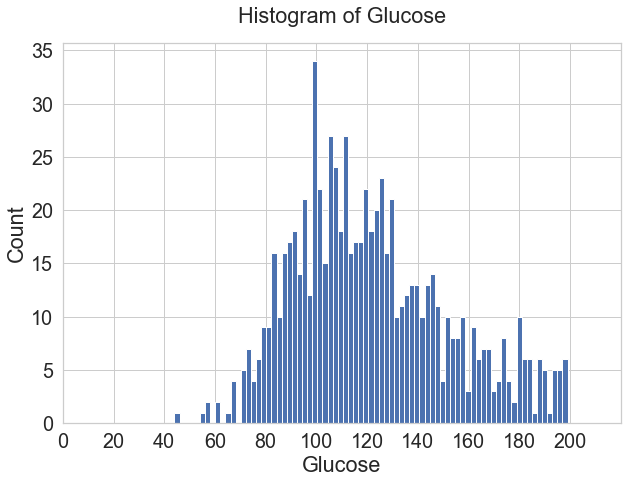

In [8]:
# 'Glucose'
feat_select = 'Glucose'
bin_size = 2
x_max = 220
plot_hist_select(diabetes_data, feat_select, bin_size, x_min, x_max, dx)

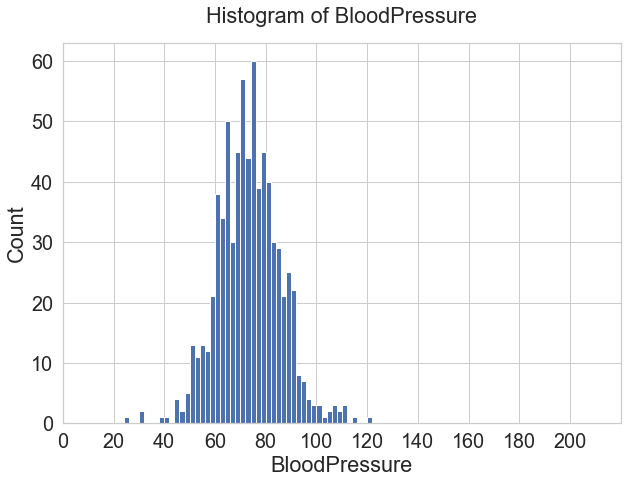

In [9]:
# 'BloodPressure'
feat_select = 'BloodPressure'

plot_hist_select(diabetes_data, feat_select, bin_size, x_min, x_max, dx)

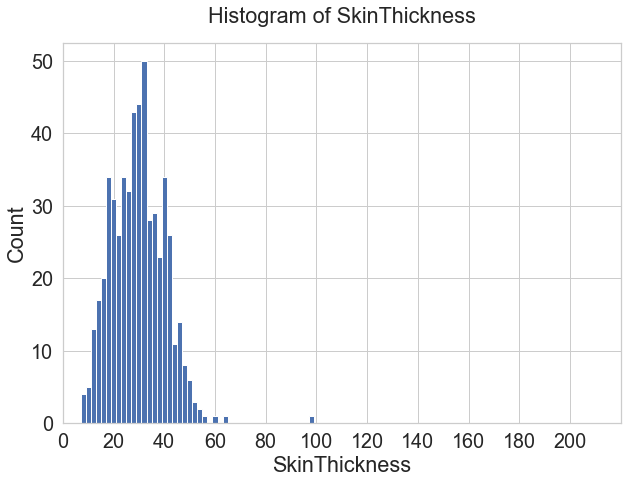

In [10]:
# 'SkinThickness'
feat_select = 'SkinThickness'

plot_hist_select(diabetes_data, feat_select, bin_size, x_min, x_max, dx)

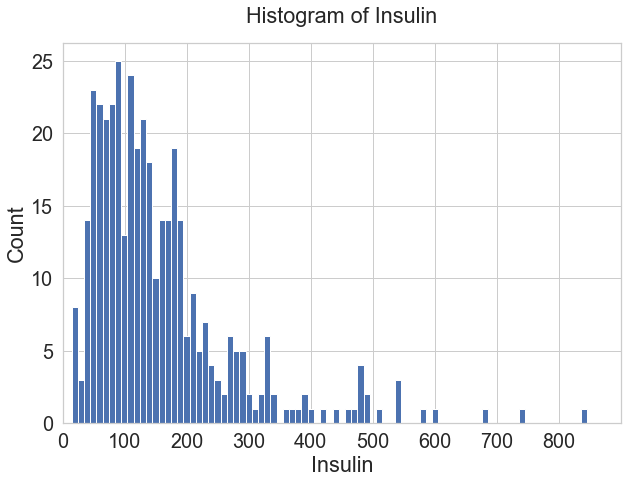

In [11]:
# 'Insulin'
feat_select = 'Insulin'
bin_size = 10
x_max = 900
dx = 100
plot_hist_select(diabetes_data, feat_select, bin_size, x_min, x_max, dx)

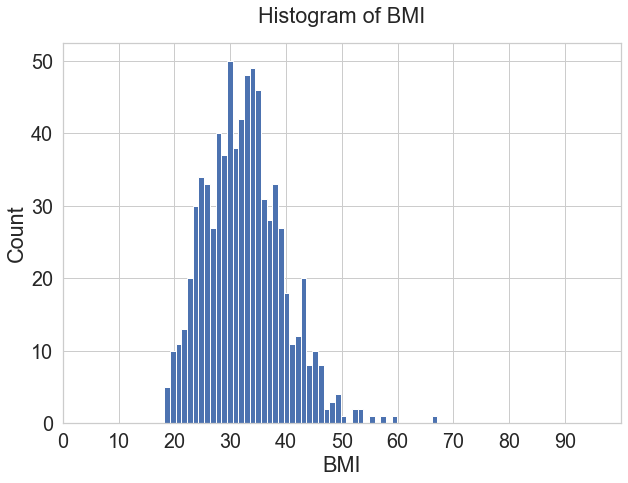

In [12]:
# 'BMI'
feat_select = 'BMI'
bin_size = 1
x_max = 100
dx = 10
plot_hist_select(diabetes_data, feat_select, bin_size, x_min, x_max, dx)

#### Replace the zeros with mean and median values.

In [13]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

#### Plot histograms of each column after replacing nan.

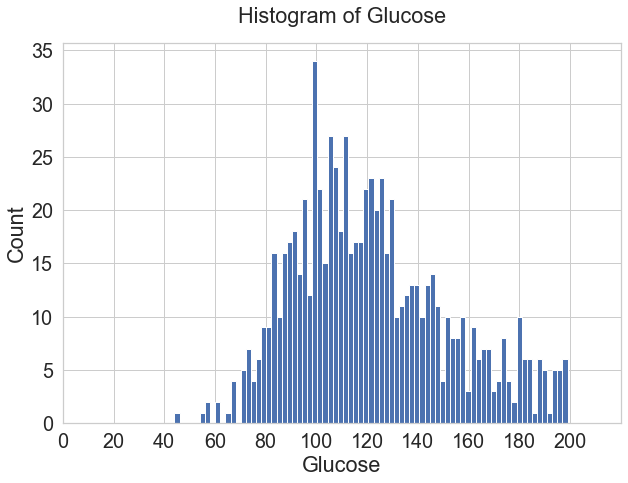

In [14]:
# 'Glucose'
feat_select = 'Glucose'
bin_size = 2
x_max = 220
dx = 20
plot_hist_select(diabetes_data, feat_select, bin_size, x_min, x_max, dx)

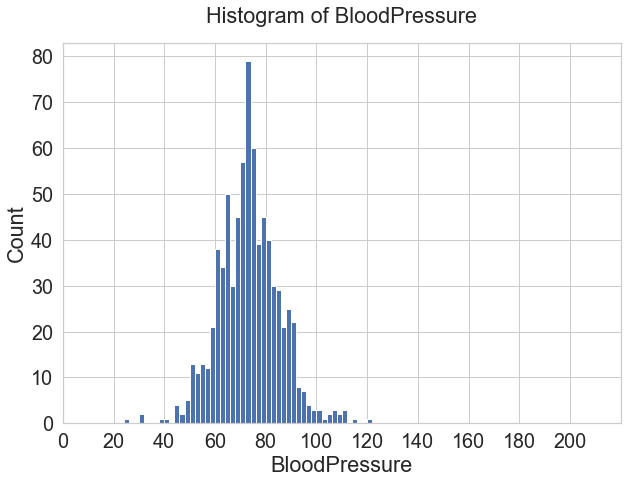

In [15]:
# 'BloodPressure'
feat_select = 'BloodPressure'

plot_hist_select(diabetes_data, feat_select, bin_size, x_min, x_max, dx)

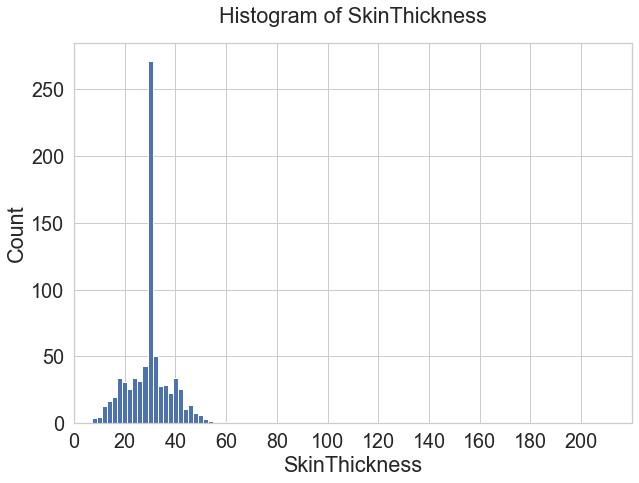

In [16]:
# 'SkinThickness'
feat_select = 'SkinThickness'

plot_hist_select(diabetes_data, feat_select, bin_size, x_min, x_max, dx)

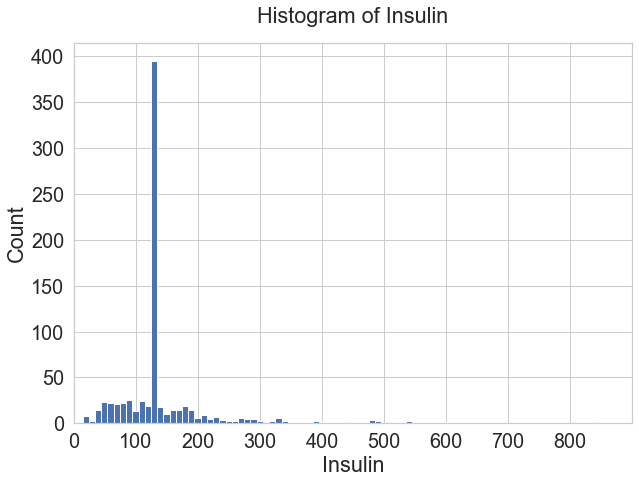

In [17]:
# 'Insulin'
feat_select = 'Insulin'
bin_size = 10
x_max = 900
dx = 100
plot_hist_select(diabetes_data, feat_select, bin_size, x_min, x_max, dx)

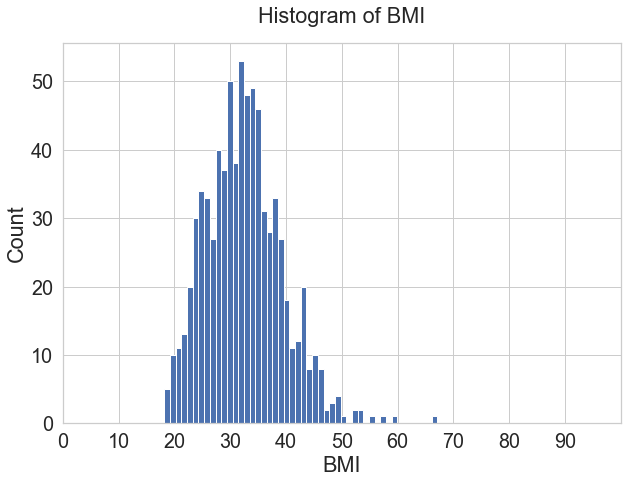

In [18]:
# 'BMI'
feat_select = 'BMI'
bin_size = 1
x_max = 100
dx = 10
plot_hist_select(diabetes_data, feat_select, bin_size, x_min, x_max, dx)

#### Plot the correlation matrix heatmap

Correlation between various features


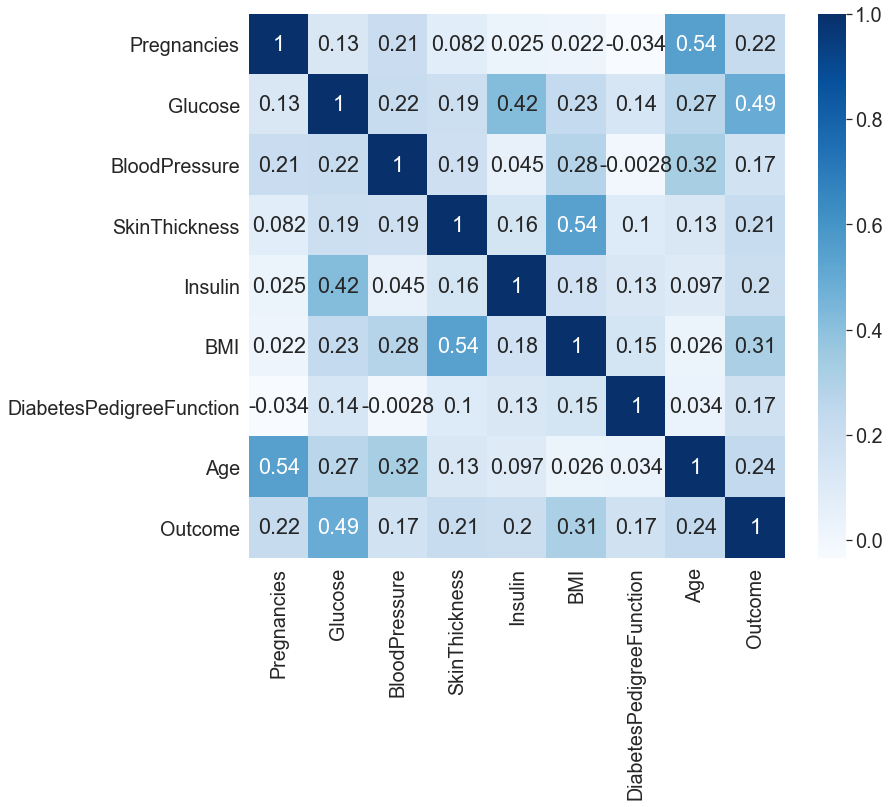

In [19]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

#### Define the `y` variable as the `Outcome` column.

In [20]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
# create X and y
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
            'BMI', 'DiabetesPedigreeFunction', 'Age']

X = diabetes_data[features]
y = diabetes_data['Outcome']

#### Create a 70/30 train and test split.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Using Sklearn, standarize the magnitude of the features by scaling the values.

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [23]:
#scale data
from sklearn import preprocessing

# build scaler based on training data; fit it to train data, then scale (transform) test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-30, apply the KNearestNeighbor classifier to classify the the data.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

n_max = 30

for i in range(1, n_max+1):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Plot the train and test model performance by number of neighbors.

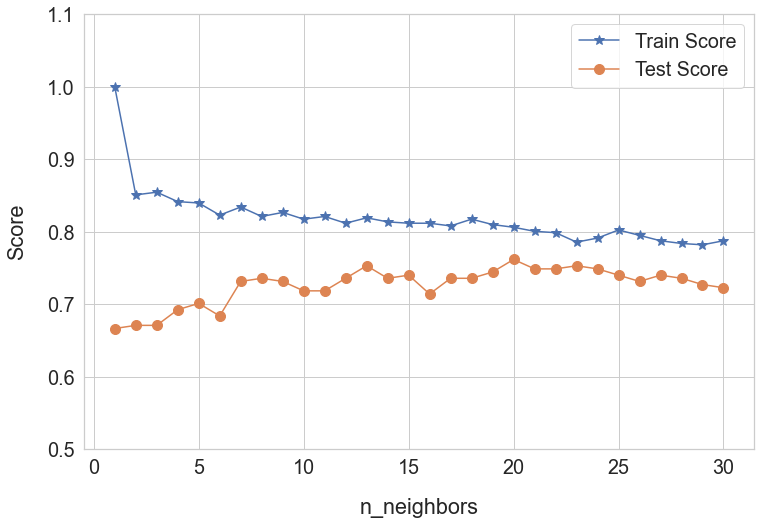

In [25]:
y_min = 0.5
y_max = 1.0
dy = 0.1

plt.figure(figsize=(12, 8))
plt.plot(range(1, n_max+1), train_scores, marker='*', ms = 10, label='Train Score')
plt.plot(range(1, n_max+1), test_scores, marker='o', ms = 10, label='Test Score')
plt.ylim(y_min, y_max+dy)
plt.yticks(np.arange(y_min, y_max+dy, dy))
plt.xlabel('n_neighbors', labelpad=20)
plt.ylabel('Score', labelpad=20)
plt.legend()
plt.show()

As an alternative use error rate.

In [26]:
# obtain error rate from validation

error_rate =[]

n_max = 30

# get error_rate for n_neighbors from 1 to 30
for i in range(1, n_max+1):
    knc = KNeighborsClassifier(n_neighbors = i)
    knc.fit(X_train, y_train)
    pred_i = knc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

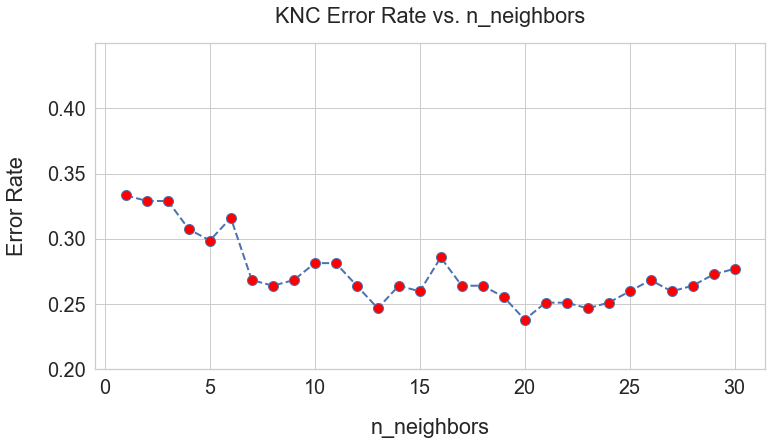

In [27]:
# plot error rate
y_min = 0.2
y_max = 0.4
dy = 0.05

plt.figure(figsize=(12,6))

plt.plot(range(1, n_max+1), error_rate, 'b--', lw = 2, marker = 'o', ms = 10, markerfacecolor = 'red')
plt.ylim(y_min, y_max+dy)
plt.yticks(np.arange(y_min, y_max+dy, dy))
plt.xlabel('n_neighbors', labelpad=20)
plt.ylabel('Error Rate', labelpad=20)
plt.title('KNC Error Rate vs. n_neighbors', pad=20)

plt.show()

The best result appears to be for n_neighbors = 20. Use it to create a new ("best") model.

#### Fit and predict using the best number of neighbors based on the plot.

In [28]:
knc = KNeighborsClassifier(n_neighbors = 20)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

#### Plot the confusion matrix for the model fit above and print the classification report.

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred))

Confusion Matrix:
[[134  17]
 [ 38  42]]


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       151
           1       0.71      0.53      0.60        80

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [32]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 31 based on the grid search performed. 

#### Use the best estimator to make new predictions.

In [33]:
knn_best = knn_cv.best_estimator_
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

In [34]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred))

Confusion Matrix:
[[125  26]
 [ 36  44]]


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       151
           1       0.63      0.55      0.59        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.73      0.73      0.73       231



### Following the KNN example, apply the grid search method to find the optimal number of estimators in a Randon Forest model.

In [35]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':np.arange(100, 310, 10)}
rfc = RandomForestClassifier()
rfc_cv= GridSearchCV(rfc, param_grid, cv=5)
rfc_cv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [36]:
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

Best Score:0.7735081911552499
Best Parameters: {'n_estimators': 260}


In [37]:
rfc_best = rfc_cv.best_estimator_
rfc_best.fit(X_train, y_train)
y_pred = rfc_best.predict(X_test)

In [38]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred))

Confusion Matrix:
[[119  32]
 [ 26  54]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.63      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

